# CMS3504-7504 Big Data Analysis - Assignment 2

In [1]:
!pip install wordcloud



In [2]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np

In [3]:
!pipenv install pyspark

Installing pyspark...

Installing dependencies from Pipfile.lock (3a1865)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.



[    ] Installing...
[=   ] Installing pyspark...
[==  ] Installing pyspark...
[=== ] Installing pyspark...
[ ===] Installing pyspark...
[  ==] Installing pyspark...
[   =] Installing pyspark...
[    ] Installing pyspark...
[   =] Installing pyspark...
[  ==] Installing pyspark...
[ ===] Installing pyspark...
[====] Installing pyspark...
[=== ] Installing pyspark...
[==  ] Installing pyspark...
[=   ] Installing pyspark...
[    ] Installing pyspark...
[=   ] Installing pyspark...
[==  ] Installing pyspark...
[=== ] Installing pyspark...
[ ===] Installing pyspark...
[  ==] Installing pyspark...
[   =] Installing pyspark...
[    ] Installing pyspark...
[   =] Installing pyspark...
[  ==] Installing pyspark...
[ ===] Installing pyspark...
[====] Installing pyspark...
[=== ] Installing pyspark...
[==  ] Installing pyspark...
[=   ] Installing pyspark...
[    ] Installing pyspark...
[=   ] Installing pyspark...
[==  ] Installing pyspark...
[=== ] Installing

In [4]:
import pyspark
import pandas as pd
import pyspark.sql
import matplotlib.pyplot as plt
import seaborn as sns
import time
import findspark
from pyspark.ml.feature import Tokenizer, RegexTokenizer,IDF
from pyspark.ml.feature import StopWordsRemover
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType
%matplotlib inline
from pyspark.ml.feature import CountVectorizer
from pyspark import SparkContext

In [5]:
findspark.init(r"C:\Users\rejee\spark-3.3.1-bin-hadoop3")

In [6]:
sc = SparkContext(master="local[1]")

In [7]:
sc

<SparkContext master=local[1] appName=pyspark-shell>

In [8]:
from pyspark.sql import SparkSession

In [9]:
spark=SparkSession.builder.appName("Amazone").getOrCreate()

In [10]:
spark


In [11]:
df = spark.read.load(".\kindle_reviews.csv", format="csv", sep=",", header="true", inferSchema=True)

In [12]:
df.show()

+---+----------+-------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|_c0|      asin|helpful|overall|          reviewText|          reviewTime|          reviewerID|        reviewerName|             summary|      unixReviewTime|
+---+----------+-------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  0|B000F83SZQ| [0, 0]|      5|I enjoy vintage b...|          05 5, 2014|      A1F6404F1VG29J|          Avidreader|  Nice vintage story|          1399248000|
|  1|B000F83SZQ| [2, 2]|      4|This book is a re...|          01 6, 2014|       AN0N05A9LIJEQ|            critters|        Different...|          1388966400|
|  2|B000F83SZQ| [2, 2]|      4|This was a fairly...|          04 4, 2014|       A795DMNCJILA6|                 dot|               Oldie|          1396569600|
|  3|B000F83SZQ| [1, 1]|      5|I'd never read

In [13]:
pip install pyspark --upgrade

Note: you may need to restart the kernel to use updated packages.


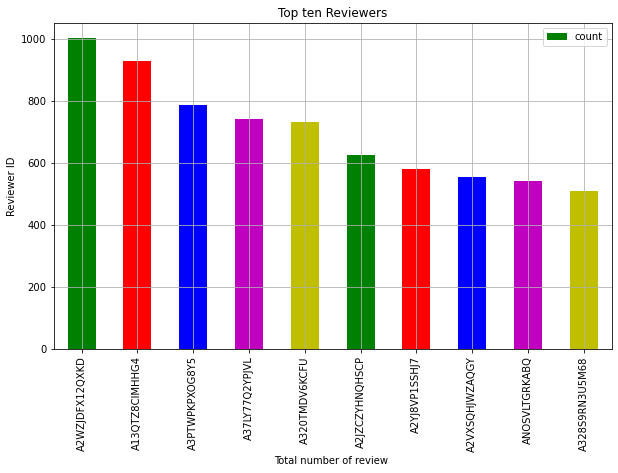

In [14]:

from pyspark.sql.functions import count

# Count the number of reviews per reviewer
reviewer_counts = df.groupBy("reviewerID").agg(count("*").alias("count"))

# Sort the dataframe by the number of reviews in descending order and take the top 10 reviewers
top_reviewers = reviewer_counts.sort("count", ascending=False).limit(10)

# Convert the PySpark dataframe to a pandas dataframe
pandas_df = top_reviewers.toPandas()

# Create a bar chart
pandas_df.plot(x='reviewerID', y='count', kind='bar', figsize=(10,6), color=['g', 'r', 'b', 'm', 'y'])

plt.grid()
plt.xlabel("Total number of review ")
plt.ylabel("Reviewer ID")
plt.title("Top ten Reviewers")

# Show the plot
plt.show()
#df.reviewerID.value_counts().head(10).plot(kind = 'bar')
#plt.xticks(rotation = 80)
#plt.xlabel('UserID')
#plt.ylabel('Number of Reviews')
#plt.show()

In [15]:
ctab = df.groupBy("overall", "reviewTime").agg(count("*").alias("count"))
ctab.show()





+-------+--------------------+-----+
|overall|          reviewTime|count|
+-------+--------------------+-----+
|      4|          10 5, 2013|  274|
|      5|         01 21, 2010|    4|
|      5| Rose feels good ...|    1|
|      1|         02 20, 2014|   44|
|      5|         01 21, 2011|   10|
|      3|         02 20, 2010|    1|
|      4|         01 24, 2013|  179|
|      3|         11 19, 2013|  146|
|      4| rather the chara...|    1|
|      5|         06 22, 2011|   34|
|      5|          02 5, 2013|  511|
|      3|         02 12, 2012|   16|
|      4| but I didn't rea...|    1|
|      3|         03 18, 2013|  122|
|      2|          05 9, 2010|    1|
|      1|          07 9, 2013|   21|
|      4|         01 11, 2010|    2|
|      5|          01 8, 2010|    4|
|      2|         07 23, 2010|    1|
|      5|             in fact|    9|
+-------+--------------------+-----+
only showing top 20 rows



In [16]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- asin: string (nullable = true)
 |-- helpful: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- unixReviewTime: string (nullable = true)



In [17]:
df.show()

+---+----------+-------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|_c0|      asin|helpful|overall|          reviewText|          reviewTime|          reviewerID|        reviewerName|             summary|      unixReviewTime|
+---+----------+-------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  0|B000F83SZQ| [0, 0]|      5|I enjoy vintage b...|          05 5, 2014|      A1F6404F1VG29J|          Avidreader|  Nice vintage story|          1399248000|
|  1|B000F83SZQ| [2, 2]|      4|This book is a re...|          01 6, 2014|       AN0N05A9LIJEQ|            critters|        Different...|          1388966400|
|  2|B000F83SZQ| [2, 2]|      4|This was a fairly...|          04 4, 2014|       A795DMNCJILA6|                 dot|               Oldie|          1396569600|
|  3|B000F83SZQ| [1, 1]|      5|I'd never read

In [18]:
df=df.drop('reviewTime','reviewerName','reviewerID','helpful','unixReviewTime')

In [19]:
df.show()

+---+----------+-------+--------------------+--------------------+
|_c0|      asin|overall|          reviewText|             summary|
+---+----------+-------+--------------------+--------------------+
|  0|B000F83SZQ|      5|I enjoy vintage b...|  Nice vintage story|
|  1|B000F83SZQ|      4|This book is a re...|        Different...|
|  2|B000F83SZQ|      4|This was a fairly...|               Oldie|
|  3|B000F83SZQ|      5|I'd never read an...|  I really liked it.|
|  4|B000F83SZQ|      4|If you like perio...|      Period Mystery|
|  5|B000F83SZQ|      4|A beautiful in-de...|              Review|
|  6|B000F83SZQ|      4|I enjoyed this on...|Nice old fashione...|
|  7|B000F83SZQ|      4|Never heard of Am...|Enjoyable reading...|
|  8|B000FA64PA|      5|Darth Maul workin...|          Darth Maul|
|  9|B000FA64PA|      4|This is a short s...|Not bad, not exce...|
| 10|B000FA64PA|      5|I think I have th...|      Audio and book|
| 11|B000FA64PA|      4|Title has nothing...|Darth Maul...the 

In [20]:
from pyspark.sql.functions import count, sum

# Count the number of reviews per score
review_counts = df.groupBy("overall").agg(count("*").alias("count"))

# Display the results
review_counts.show()

+-------+------+
|overall| count|
+-------+------+
|   null|   201|
|      1| 23018|
|      3| 96194|
|      5|575264|
|      4|254013|
|      2| 34130|
+-------+------+



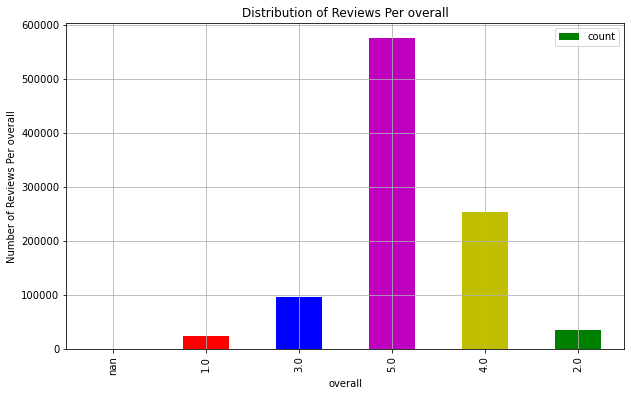

In [21]:


pandas_df = review_counts.toPandas()

# Create a bar chart
pandas_df.plot(x='overall', y='count', kind='bar', figsize=(10,6), color=['g', 'r', 'b', 'm', 'y'])
plt.grid()
plt.xlabel("overall")
plt.ylabel("Number of Reviews Per overall")
plt.title("Distribution of Reviews Per overall")

# Show the plot
plt.show()

In [22]:
df=df.select('summary','overall')

In [23]:
df.show()

+--------------------+-------+
|             summary|overall|
+--------------------+-------+
|  Nice vintage story|      5|
|        Different...|      4|
|               Oldie|      4|
|  I really liked it.|      5|
|      Period Mystery|      4|
|              Review|      4|
|Nice old fashione...|      4|
|Enjoyable reading...|      4|
|          Darth Maul|      5|
|Not bad, not exce...|      4|
|      Audio and book|      5|
|Darth Maul...the ...|      4|
|Not bad; it is we...|      3|
|Han and Leia reun...|      3|
|  Possibly Important|      5|
|        Another read|      5|
|            Recovery|      5|
|Star Wars: The Ne...|      3|
|       my collection|      5|
| where it's bille...|      4|
+--------------------+-------+
only showing top 20 rows



In [24]:
df.groupBy('overall').count().show()

+-------+------+
|overall| count|
+-------+------+
|   null|   201|
|      1| 23018|
|      3| 96194|
|      5|575264|
|      4|254013|
|      2| 34130|
+-------+------+



In [25]:
df.toPandas()['overall'].value_counts()

5.0    575264
4.0    254013
3.0     96194
2.0     34130
1.0     23018
Name: overall, dtype: int64

In [26]:
df.toPandas()['overall'].isnull().sum()

201

In [27]:
df.toPandas()['summary'].isnull().sum()

435

In [28]:
df = df.na.drop(subset=['summary', 'overall'])

In [29]:
df.toPandas()['overall'].isnull().sum()

0

In [30]:
df.toPandas()['summary'].isnull().sum()

0

In [31]:
df.show(5)

+------------------+-------+
|           summary|overall|
+------------------+-------+
|Nice vintage story|      5|
|      Different...|      4|
|             Oldie|      4|
|I really liked it.|      5|
|    Period Mystery|      4|
+------------------+-------+
only showing top 5 rows



In [32]:
import pyspark.ml.feature

In [33]:
from pyspark.ml.feature import StringIndexer

In [34]:
tokenizer=Tokenizer(inputCol='summary',outputCol='review_token')
stop_words=StopWordsRemover(inputCol='review_token',outputCol='review_stop')
countvector=CountVectorizer(inputCol='review_stop',outputCol='review_count')
Idf=IDF(inputCol='review_count',outputCol='Idf_features')

In [35]:
#labelEncoder = StringIndexer(inputCol='overall', outputCol='label').fit(df)

In [36]:
#labelEncoder.transform(df).show(5)

In [37]:
#labelEncoder.labels

In [38]:
df.show()

+--------------------+-------+
|             summary|overall|
+--------------------+-------+
|  Nice vintage story|      5|
|        Different...|      4|
|               Oldie|      4|
|  I really liked it.|      5|
|      Period Mystery|      4|
|              Review|      4|
|Nice old fashione...|      4|
|Enjoyable reading...|      4|
|          Darth Maul|      5|
|Not bad, not exce...|      4|
|      Audio and book|      5|
|Darth Maul...the ...|      4|
|Not bad; it is we...|      3|
|Han and Leia reun...|      3|
|  Possibly Important|      5|
|        Another read|      5|
|            Recovery|      5|
|Star Wars: The Ne...|      3|
|       my collection|      5|
| where it's bille...|      4|
+--------------------+-------+
only showing top 20 rows



In [91]:
#df = labelEncoder.transform(df)

In [40]:
df.show(5)

+------------------+-------+
|           summary|overall|
+------------------+-------+
|Nice vintage story|      5|
|      Different...|      4|
|             Oldie|      4|
|I really liked it.|      5|
|    Period Mystery|      4|
+------------------+-------+
only showing top 5 rows



In [41]:
(trainDF,testDF)=df.randomSplit((0.8,0.2),seed=42)


In [42]:
trainDF.show(5)

+--------------------+-------+
|             summary|overall|
+--------------------+-------+
|  Cats and romanc...|      5|
|       Charles Vance|      2|
|    Have a nice day"|      5|
|  I can see a tre...|      2|
|  I have trouble ...|      5|
+--------------------+-------+
only showing top 5 rows



In [43]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
#df1=LabelEncoder.transform(df)

In [ ]:
#lr = LogisticRegression(featuresCol='Idf_features', labelCol='overall', maxIter=10)

In [93]:
lr=LogisticRegression(featuresCol='Idf_features',labelCol='overall',maxIter=10)

In [94]:
pipeline = Pipeline(stages=[tokenizer,stop_words,countvector,Idf,lr])

In [46]:
pipeline

Pipeline_716a48ea2534

In [47]:
pipeline.stages

Param(parent='Pipeline_716a48ea2534', name='stages', doc='a list of pipeline stages')

In [95]:
# Building MOdel
lr_model = pipeline.fit(trainDF)

In [49]:
lr_model

PipelineModel_c1e8e7b976be

In [96]:
# Predictions on our Test Dataset
predictions = lr_model.transform(testDF)

In [97]:
predictions.show()

+--------------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|             summary|overall|        review_token|         review_stop|        review_count|        Idf_features|       rawPrediction|         probability|prediction|
+--------------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|              Hatrid|      4|        [, , hatrid]|        [, , hatrid]|(185971,[3,62332]...|(185971,[3,62332]...|[-9.6104541864445...|[1.81471998324960...|       4.0|
|  I look forward ...|      5|[, , i, look, for...|[, , look, forwar...|(185971,[3,91,202...|(185971,[3,91,202...|[-9.6103931059187...|[5.32283502254109...|       5.0|
|               Keta |      5|          [, , keta]|          [, , keta]|(185971,[3,26900]...|(185971,[3,26900]...|[-9.6104790530806...|[1.26046995024030...|    

In [98]:
# Select Columns
predictions.columns

['summary',
 'overall',
 'review_token',
 'review_stop',
 'review_count',
 'Idf_features',
 'rawPrediction',
 'probability',
 'prediction']

In [99]:
predictions.select('rawPrediction','probability','summary','overall','prediction').show(10)

+--------------------+--------------------+--------------------+-------+----------+
|       rawPrediction|         probability|             summary|overall|prediction|
+--------------------+--------------------+--------------------+-------+----------+
|[-9.6104541864445...|[1.81471998324960...|              Hatrid|      4|       4.0|
|[-9.6103931059187...|[5.32283502254109...|  I look forward ...|      5|       5.0|
|[-9.6104790530806...|[1.26046995024030...|               Keta |      5|       5.0|
|[-9.6101773404206...|[3.29033520094066...|  and it was too ...|      3|       3.0|
|[-9.6095516402852...|[4.42638142150873...|  his mate works ...|      4|       4.0|
|[-9.6104493469224...|[5.71367293611219...|  she worries abo...|      3|       5.0|
|[-9.6103588579073...|[1.21562645299511...|  with that...it ...|      3|       3.0|
|[-9.6104709543302...|[9.81106307318036...|          ""-esque""|      1|       1.0|
|[-9.6103685846691...|[1.12378110108463...| ""Beauty"" will ...|      1|    

In [100]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [101]:
evaluator = MulticlassClassificationEvaluator(labelCol='overall',predictionCol='prediction',metricName='accuracy')

In [102]:
accuracy = evaluator.evaluate(predictions)

In [103]:
accuracy

0.7105804271259594

In [84]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [85]:
lr_metric = MulticlassMetrics(predictions['overall','prediction'].rdd)

C:\Users\rejee\anaconda3\lib\site-packages\pyspark\sql\context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [68]:
#print("Accuracy:",lr_metric.accuracy)
#print("Precision:",lr_metric.precision(1.0))
#print("Recall:",lr_metric.recall(1.0))
#print("F1Score:",lr_metric.fMeasure(1.0))

In [86]:
y_true = predictions.select('overall')
y_true = y_true.toPandas()
y_pred = predictions.select('prediction')
y_pred = y_pred.toPandas()

In [87]:
from sklearn.metrics import confusion_matrix,classification_report

In [88]:
cm = confusion_matrix(y_true,y_pred)

In [89]:
cm

array([[  2392,    486,    353,    231,   1211],
       [   502,   2681,   1213,    509,   1990],
       [   272,    656,   8290,   4100,   5904],
       [   143,    235,   1894,  22405,  26007],
       [   227,    316,    981,   9337, 104141]], dtype=int64)

In [90]:
# Classication Report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           1       0.68      0.51      0.58      4673
           2       0.61      0.39      0.48      6895
           3       0.65      0.43      0.52     19222
           4       0.61      0.44      0.51     50684
           5       0.75      0.91      0.82    115002

    accuracy                           0.71    196476
   macro avg       0.66      0.54      0.58    196476
weighted avg       0.70      0.71      0.69    196476



In [ ]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()